In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
co_df = pd.read_csv('J:\MMM_Data\customer_orders_df.csv')

In [3]:
len(co_df)

33696

In [4]:
co_df.rename(columns={'Requested Date': 'Requested_Date', 'Creation Date': 'Creation_Date', 'Shipped Date':'Shipped_Date'}, inplace=True)
co_df.rename(columns={'Order Number': 'Order_Number', 'Order Line': 'Order_Line', 'Requested Quantity':'Requested_Quantity', 'Shipped Quantity':'Shipped_Quantity'}, inplace=True)

In [5]:
co_df['Creation_Date'] =pd.to_datetime(co_df.Creation_Date, format='%d.%m.%Y %H:%M')
co_df['Requested_Date'] =pd.to_datetime(co_df.Requested_Date, format='%d.%m.%Y')
co_df['Shipped_Date'] =pd.to_datetime(co_df.Shipped_Date, format='%d.%m.%Y')

## Questions to be asked
1. what about the floating point values in Requested Quantity
2. what about negative values in Requested Quantity

In [6]:
co_df['Delay']=(co_df['Shipped_Date']-co_df['Requested_Date']).dt.days

In [7]:
co_df["Deficit"]=co_df["Requested_Quantity"]-co_df["Shipped_Quantity"]

In [8]:
co_df.head()

,Order_Number,Order_Line,Outlet,Part,Creation_Date,Requested_Date,Shipped_Date,Requested_Quantity,Shipped_Quantity,Delay,Deficit
0,Order_01,1,1,8WW91511052540M,2017-01-14,2017-01-14,2017-01-14,-1.0,-1.0,0,0.0
1,Order_02,3,1,6YX87639578537D,2017-01-07,2017-01-07,2017-01-09,12.0,12.0,2,0.0
2,Order_02,7,1,4RQ12578481053J,2016-12-30,2016-12-30,2016-12-30,2.0,2.0,0,0.0
3,Order_03,1,1,2DS35615142379C,2016-12-29,2016-12-29,2016-12-29,3.0,3.0,0,0.0
4,Order_03,2,1,5DG98783853149R,2016-12-27,2016-12-27,2017-01-06,8.0,8.0,10,0.0


In [9]:
co_df_delay=co_df.loc[co_df["Delay"]<0]

In [10]:
len(co_df_delay)

5

In [11]:
drop_Req_Quant=co_df.index[co_df["Requested_Quantity"] <= 0].tolist()

In [12]:
co_df=co_df.drop(co_df.index[drop_Req_Quant])

In [13]:
co_df.sort_values(by=['Requested_Date'], inplace=True, ascending=True)

In [14]:
co_df.head()

,Order_Number,Order_Line,Outlet,Part,Creation_Date,Requested_Date,Shipped_Date,Requested_Quantity,Shipped_Quantity,Delay,Deficit
7602,Order_4838,1,2,7WT30850004924P,2016-12-26,2016-12-26,2017-03-08,2.0,2.0,72,0.0
8,Order_05,1,1,10LT38882262598Q,2016-12-26,2016-12-26,2016-12-26,1.0,1.0,0,0.0
9,Order_06,1,1,9DG12017945528Y,2016-12-26,2016-12-26,2016-12-26,2.0,2.0,0,0.0
9935,Order_6706,9,2,9TZ23479641614Z,2017-01-13,2016-12-27,2016-12-27,7.0,7.0,0,0.0
4,Order_03,2,1,5DG98783853149R,2016-12-27,2016-12-27,2017-01-06,8.0,8.0,10,0.0


In [15]:
#co_df.to_excel("Barkawi.xlsx")

In [16]:
demand_part1 = co_df["Requested_Quantity"].values.tolist()
neg_demand1=[]
for x in demand_part1:
    if x <=0:
        neg_demand1.append(x)
print(len(neg_demand1))

0


In [17]:
co_df["Indexdate"]=co_df["Requested_Date"]

In [18]:
co_df_indexed=co_df.set_index(["Indexdate"])

In [19]:
co_df_part = co_df.loc[co_df["Part"]=="8YE32821942352L"]

In [20]:
co_df_part.head()

,Order_Number,Order_Line,Outlet,Part,Creation_Date,Requested_Date,Shipped_Date,Requested_Quantity,Shipped_Quantity,Delay,Deficit,Indexdate
18852,Order_13012,21,5,8YE32821942352L,2016-12-29,2016-12-29,2016-12-29,24.0,24.0,0,0.0,2016-12-29
16731,Order_11556,2,4,8YE32821942352L,2017-01-04,2017-01-04,2017-01-04,3.0,3.0,0,0.0,2017-01-04
3783,Order_3037,14,1,8YE32821942352L,2017-01-03,2017-01-04,2017-01-04,1.0,1.0,0,0.0,2017-01-04
27482,Order_19193,7,8,8YE32821942352L,2017-01-05,2017-01-05,2017-01-05,7.0,7.0,0,0.0,2017-01-05
9909,Order_6699,50,2,8YE32821942352L,2017-02-09,2017-01-06,2017-01-06,10.0,10.0,0,0.0,2017-01-06


In [21]:
co_df_part_1 = co_df_part.loc[co_df_part["Outlet"]==1]

In [22]:
co_df_part_1.head(52)

,Order_Number,Order_Line,Outlet,Part,Creation_Date,Requested_Date,Shipped_Date,Requested_Quantity,Shipped_Quantity,Delay,Deficit,Indexdate
3783,Order_3037,14,1,8YE32821942352L,2017-01-03,2017-01-04,2017-01-04,1.0,1.0,0,0.0,2017-01-04
3784,Order_3038,3,1,8YE32821942352L,2017-01-09,2017-01-09,2017-01-09,6.0,6.0,0,0.0,2017-01-09
3753,Order_3024,52,1,8YE32821942352L,2017-01-23,2017-01-13,2017-01-14,4.5,4.5,1,0.0,2017-01-13
3711,Order_3017,57,1,8YE32821942352L,2017-01-11,2017-01-13,2017-01-13,10.0,10.0,0,0.0,2017-01-13
3703,Order_3015,63,1,8YE32821942352L,2017-02-01,2017-01-21,2017-01-21,6.7,6.7,0,0.0,2017-01-21
3815,Order_3055,22,1,8YE32821942352L,2017-01-26,2017-01-22,2017-01-29,26.0,26.0,7,0.0,2017-01-22
3794,Order_3045,13,1,8YE32821942352L,2017-01-25,2017-01-25,2017-01-25,14.0,14.0,0,0.0,2017-01-25
3705,Order_3015,111,1,8YE32821942352L,2017-02-01,2017-02-01,2017-02-01,27.0,27.0,0,0.0,2017-02-01
3841,Order_3061,15,1,8YE32821942352L,2017-02-02,2017-02-02,2017-02-02,14.0,14.0,0,0.0,2017-02-02
3888,Order_3084,11,1,8YE32821942352L,2017-02-27,2017-02-27,2017-03-07,1.0,1.0,8,0.0,2017-02-27


In [23]:
co_df_part_1["Indexdate"]=co_df_part_1["Requested_Date"]

C:\Users\sattwik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
co_df_part_1 = co_df_part_1.set_index(["Indexdate"])

In [25]:
co_df_part_1_weekly = co_df_part_1.resample('W').sum()

In [26]:
co_df_part_1_weekly.head()

,Order_Line,Outlet,Requested_Quantity,Shipped_Quantity,Delay,Deficit
Indexdate,,,,,,
2017-01-08,14,1,1.0,1.0,0,0.0
2017-01-15,112,3,20.5,20.5,1,0.0
2017-01-22,85,2,32.7,32.7,7,0.0
2017-01-29,13,1,14.0,14.0,0,0.0
2017-02-05,126,2,41.0,41.0,0,0.0


In [27]:
co_df_part_1_weekly.describe()

,Order_Line,Outlet,Requested_Quantity,Shipped_Quantity,Delay,Deficit
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.0
mean,60.808917,1.617834,16.185987,16.185987,2.369427,0.0
std,399.554097,1.327882,17.476029,17.476029,8.328424,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,2.000000,1.000000,3.000000,3.000000,0.000000,0.0
50%,13.000000,1.000000,11.000000,11.000000,0.000000,0.0
75%,37.000000,2.000000,23.000000,23.000000,2.000000,0.0
max,5008.000000,6.000000,89.000000,89.000000,97.000000,0.0


In [51]:
co_df_part_1_weekly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 157 entries, 2017-01-08 to 2020-01-05
Freq: W-SUN
Data columns (total 7 columns):
Order_Line             157 non-null int64
Outlet                 157 non-null int64
Requested_Quantity     157 non-null float64
Shipped_Quantity       157 non-null float64
Delay                  157 non-null int64
Deficit                157 non-null float64
Seasonal_Difference    105 non-null float64
dtypes: float64(4), int64(3)
memory usage: 9.8 KB


In [28]:
len(co_df_part_1_weekly)

157

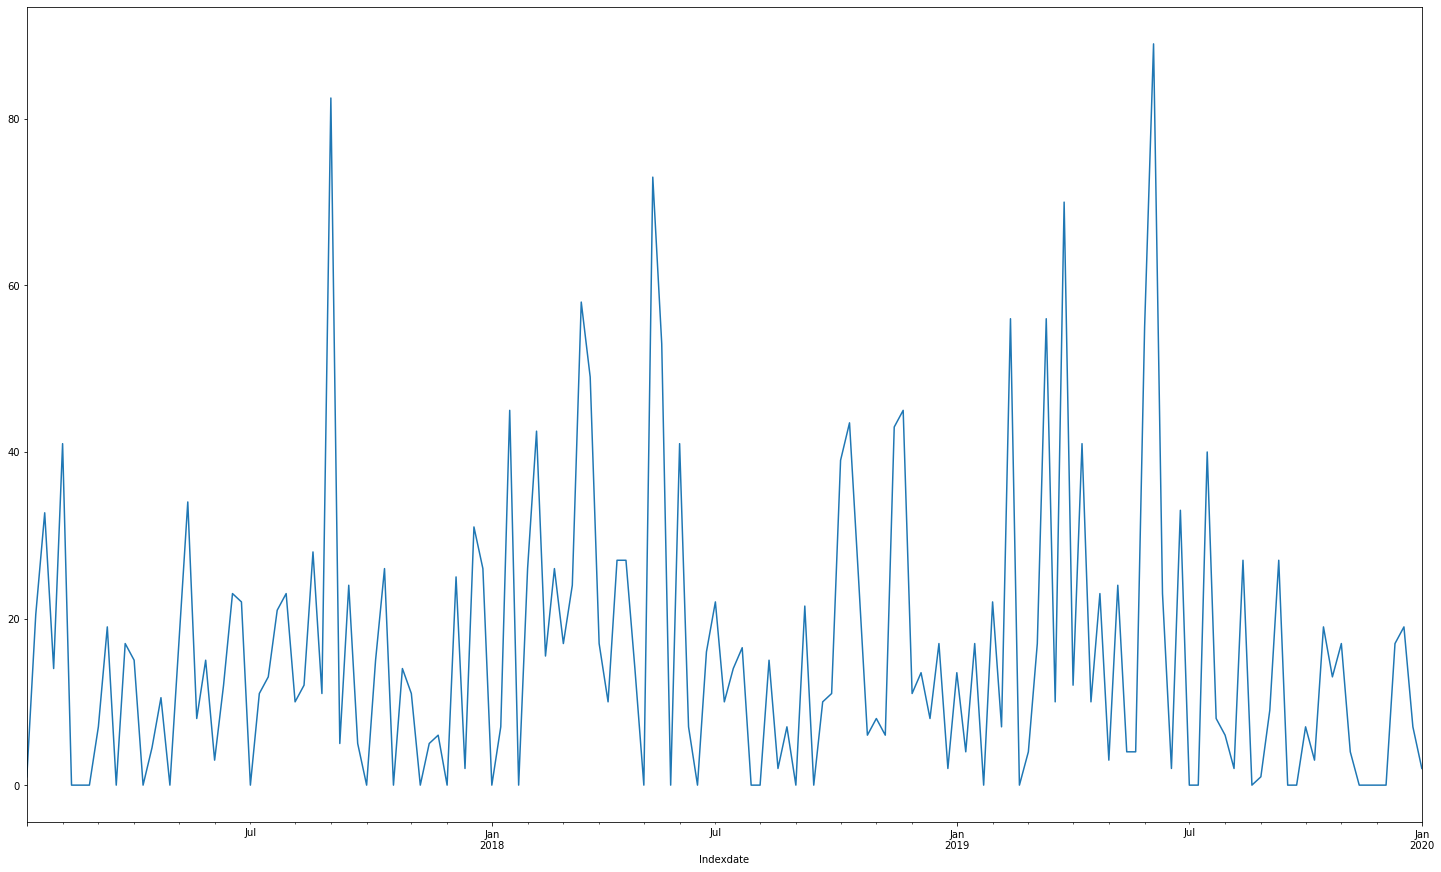

In [29]:
co_df_part_1_weekly["Requested_Quantity"].plot(figsize = (25,15))

In [30]:
demand_part2 = co_df_part_1_weekly["Requested_Quantity"].values.tolist()
neg_demand2=[]
for x in demand_part2:
    if x <=0:
        neg_demand2.append(x)
print(len(neg_demand2))

31


In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

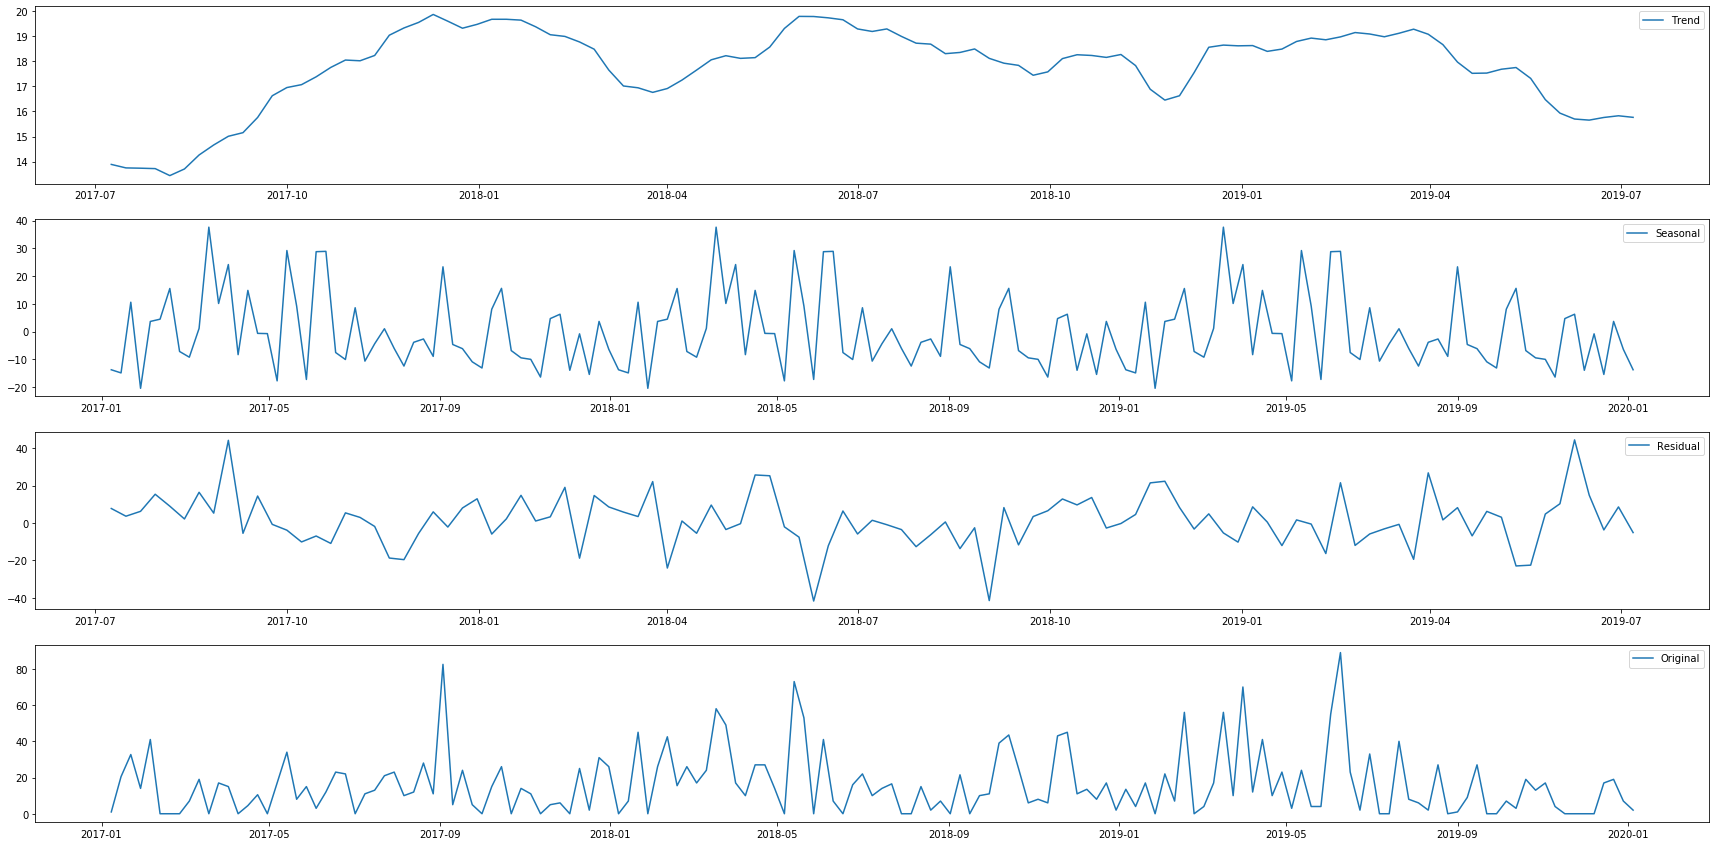

In [32]:
decomposition = seasonal_decompose(co_df_part_1_weekly["Requested_Quantity"])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

f = plt.figure(figsize=(30,15))
ax1 = f.add_subplot(411)
ax2 = f.add_subplot(412)
ax3 = f.add_subplot(413)
ax4 = f.add_subplot(414)

ax1.plot(trend, label = 'Trend')
ax1.legend(loc='best')

ax2.plot(seasonal, label = 'Seasonal')
ax2.legend(loc='best')

ax3.plot(residual, label= 'Residual')
ax3.legend(loc='best')

ax4.plot(co_df_part_1_weekly.index, co_df_part_1_weekly['Requested_Quantity'], label= 'Original')
ax4.legend(loc='best')

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

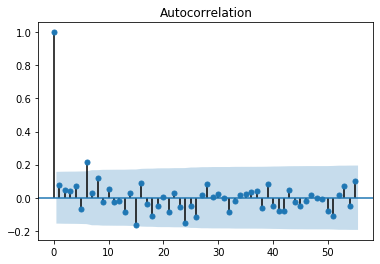

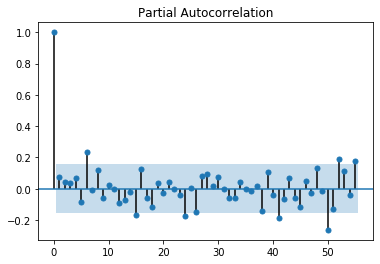

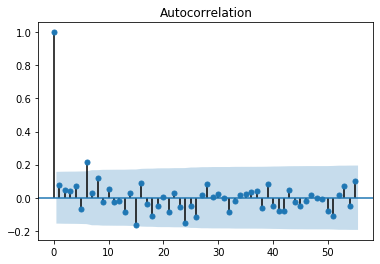

In [34]:
plot_pacf(co_df_part_1_weekly['Requested_Quantity'], lags=55)
plot_acf(co_df_part_1_weekly['Requested_Quantity'], lags=55)

In [35]:
co_df_part_1_weekly['Seasonal_Difference']= co_df_part_1_weekly['Requested_Quantity'] - co_df_part_1_weekly['Requested_Quantity'].shift(52)

### Verifying acf and pacf with seasonal difference

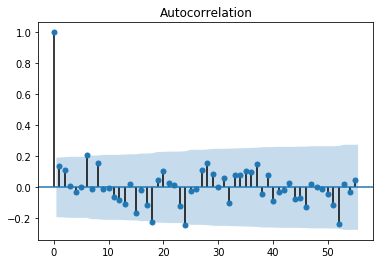

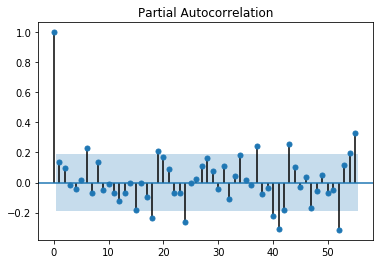

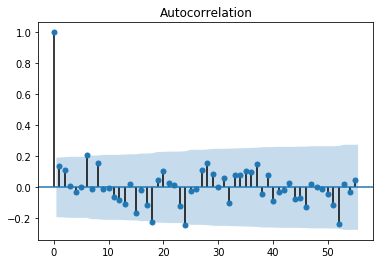

In [36]:
plot_pacf(co_df_part_1_weekly['Seasonal_Difference'].dropna(), lags=55)
plot_acf(co_df_part_1_weekly['Seasonal_Difference'].dropna(), lags=55)

In [37]:
from statsmodels.tsa.stattools import adfuller

In [38]:
dftest = adfuller(co_df_part_1_weekly["Requested_Quantity"], autolag='AIC')

dftest_output = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags used', 'number of obserbations used'])
for key, value in dftest[4].items():
    dftest_output['Critical Values (%s)' %key]=value
    
print(dftest_output)

Test Statistic                  -3.706467
p-value                          0.004023
#lags used                       5.000000
number of obserbations used    151.000000
Critical Values (1%)            -3.474416
Critical Values (5%)            -2.880878
Critical Values (10%)           -2.577081
dtype: float64


In [39]:
dftest_seasonal = adfuller(co_df_part_1_weekly["Seasonal_Difference"].dropna(), autolag='AIC')

dftest_seasonal_output = pd.Series(dftest_seasonal[0:4], index=['Test Statistic', 'p-value', '#lags used', 'number of obserbations used'])
for key, value in dftest_seasonal[4].items():
    dftest_seasonal_output['Critical Values (%s)' %key]=value
    
print(dftest_seasonal_output)

Test Statistic                -8.789154e+00
p-value                        2.265286e-14
#lags used                     0.000000e+00
number of obserbations used    1.040000e+02
Critical Values (1%)          -3.494850e+00
Critical Values (5%)          -2.889758e+00
Critical Values (10%)         -2.581822e+00
dtype: float64


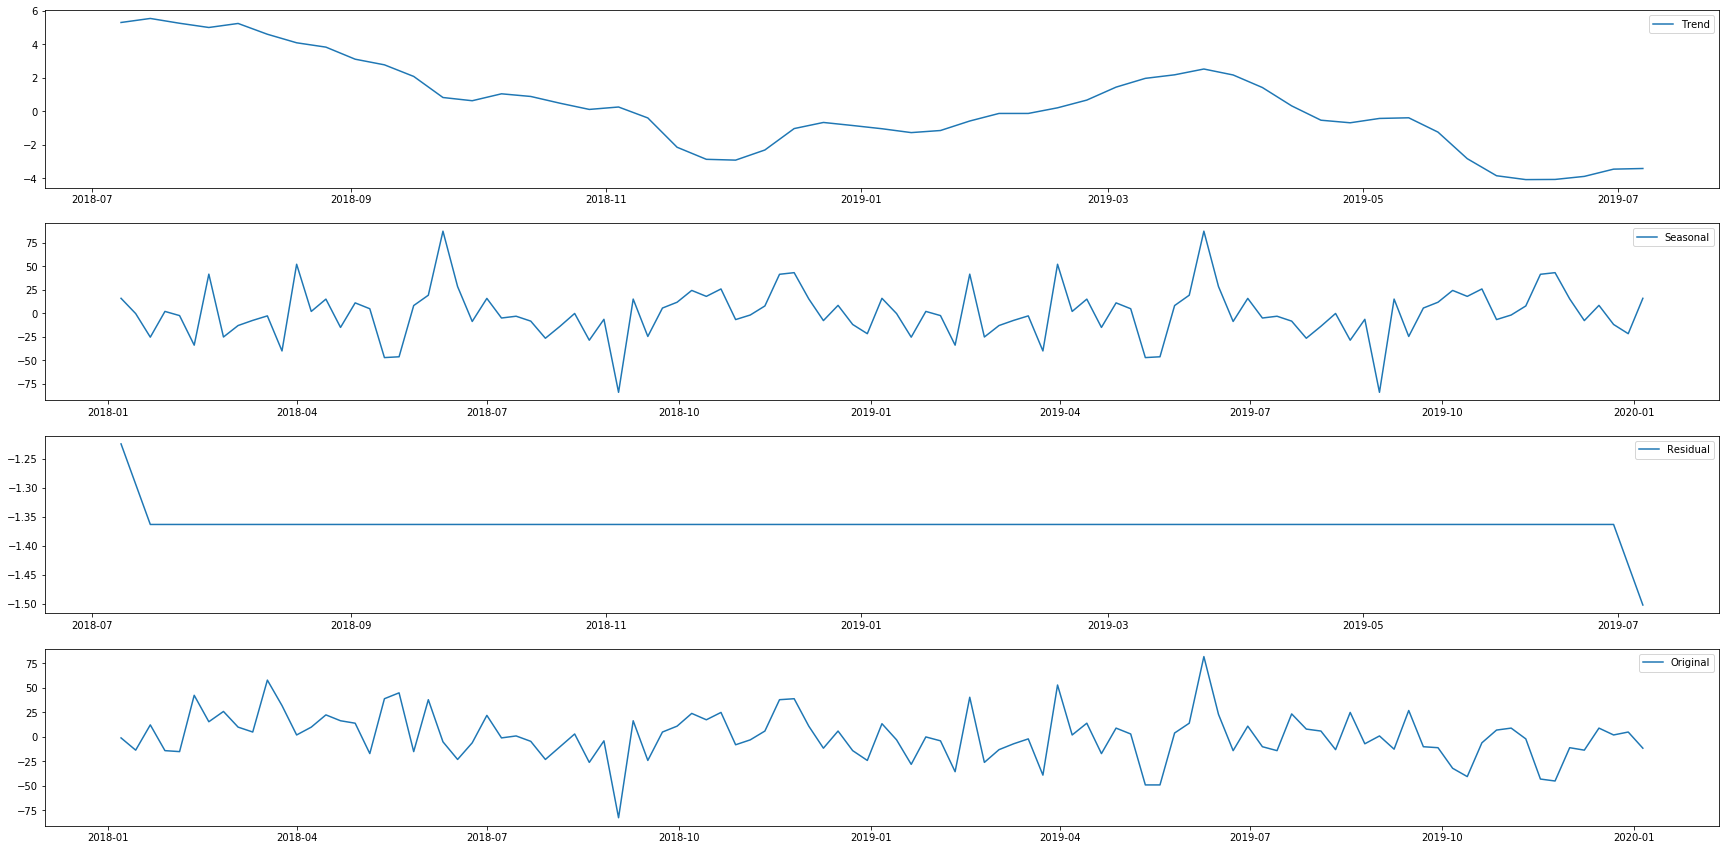

In [40]:
decomposition_s = seasonal_decompose(co_df_part_1_weekly["Seasonal_Difference"].dropna())

trend_s = decomposition_s.trend
seasonal_s = decomposition_s.seasonal
residual_s = decomposition_s.resid

f = plt.figure(figsize=(30,15))
ax1 = f.add_subplot(411)
ax2 = f.add_subplot(412)
ax3 = f.add_subplot(413)
ax4 = f.add_subplot(414)

ax1.plot(trend_s, label = 'Trend')
ax1.legend(loc='best')

ax2.plot(seasonal_s, label = 'Seasonal')
ax2.legend(loc='best')

ax3.plot(residual_s, label= 'Residual')
ax3.legend(loc='best')

ax4.plot(co_df_part_1_weekly.index, co_df_part_1_weekly['Seasonal_Difference'], label= 'Original')
ax4.legend(loc='best')

## Observations:
1. p-value< 0.05 and Test statistic < Critical Value (1%) => Data is stationary. <br>
2. But, we have seen from PACF and ACF that there are intervals such as d=6, d=50, d=52 and d=54 where there is a significant value of PACF and ACF. This implies there is a correlation between timeseries shifted by these intervals.<br>
3. From seasonal decompose it can be seen that we have a seasonality as the patterns repeat yearly.<br>
4. Based on the above observations, it can be inferred that we need to Fit a Seasonal ARIMA model. <br>
5. We will do a grid search to determine the parameters based on the best AIC value. <br>

In [41]:
import itertools

In [42]:
p = d = q = range(0,2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 52)
SARIMAX: (0, 0, 1) x (0, 1, 0, 52)
SARIMAX: (0, 1, 0) x (0, 1, 1, 52)
SARIMAX: (0, 1, 0) x (1, 0, 0, 52)


In [43]:
import statsmodels.api as sm

In [44]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(co_df_part_1_weekly['Requested_Quantity'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results=mod.fit()
            print('ARIMA{}x{}52 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 52)52 - AIC:1434.3735713623619


C:\Users\sattwik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:887: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:]**2).mean()
C:\Users\sattwik\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\sattwik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1014: RuntimeWarning: invalid value encountered in less
  params_variance = np.atleast_1d(max(np.array(params_variance), 1e-10))
C:\Users\sattwik\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\sattwik\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1855: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


ARIMA(0, 0, 0)x(0, 0, 1, 52)52 - AIC:nan
ARIMA(0, 0, 0)x(0, 1, 0, 52)52 - AIC:963.2115304985961
ARIMA(0, 0, 0)x(1, 0, 0, 52)52 - AIC:952.2502953441237


C:\Users\sattwik\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 52)52 - AIC:nan
ARIMA(0, 0, 0)x(1, 1, 0, 52)52 - AIC:481.2627241463121
ARIMA(0, 0, 1)x(0, 0, 0, 52)52 - AIC:1400.919591693042


C:\Users\sattwik\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 52)52 - AIC:4191.847881696883
ARIMA(0, 0, 1)x(0, 1, 0, 52)52 - AIC:955.0213169769079
ARIMA(0, 0, 1)x(1, 0, 0, 52)52 - AIC:947.8500077585626
ARIMA(0, 0, 1)x(1, 0, 1, 52)52 - AIC:933.1210723884057
ARIMA(0, 0, 1)x(1, 1, 0, 52)52 - AIC:482.8469107763049
ARIMA(0, 1, 0)x(0, 0, 0, 52)52 - AIC:1423.5249004196705
ARIMA(0, 1, 0)x(0, 1, 0, 52)52 - AIC:1010.8108363100304
ARIMA(0, 1, 0)x(1, 0, 0, 52)52 - AIC:966.9297539941458
ARIMA(0, 1, 0)x(1, 1, 0, 52)52 - AIC:504.26199062795143
ARIMA(0, 1, 1)x(0, 0, 0, 52)52 - AIC:1326.890894417746
ARIMA(0, 1, 1)x(0, 1, 0, 52)52 - AIC:949.7956407636462
ARIMA(0, 1, 1)x(1, 0, 0, 52)52 - AIC:911.5987422228484
ARIMA(0, 1, 1)x(1, 1, 0, 52)52 - AIC:478.85885637082396
ARIMA(1, 0, 0)x(0, 0, 0, 52)52 - AIC:1390.1562939315152


C:\Users\sattwik\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 52)52 - AIC:4311.741793033698
ARIMA(1, 0, 0)x(0, 1, 0, 52)52 - AIC:963.2128688236286
ARIMA(1, 0, 0)x(1, 0, 0, 52)52 - AIC:935.7005697150435
ARIMA(1, 0, 0)x(1, 0, 1, 52)52 - AIC:937.7002810264667
ARIMA(1, 0, 0)x(1, 1, 0, 52)52 - AIC:474.49128577012516
ARIMA(1, 0, 1)x(0, 0, 0, 52)52 - AIC:1336.8667719163045
ARIMA(1, 0, 1)x(0, 0, 1, 52)52 - AIC:5655.105338234904
ARIMA(1, 0, 1)x(0, 1, 0, 52)52 - AIC:956.0621195206874
ARIMA(1, 0, 1)x(1, 0, 0, 52)52 - AIC:913.0120727853111
ARIMA(1, 0, 1)x(1, 0, 1, 52)52 - AIC:905.3640203629012
ARIMA(1, 0, 1)x(1, 1, 0, 52)52 - AIC:476.4821178046721
ARIMA(1, 1, 0)x(0, 0, 0, 52)52 - AIC:1383.9675408365915
ARIMA(1, 1, 0)x(0, 1, 0, 52)52 - AIC:985.3366175894603
ARIMA(1, 1, 0)x(1, 0, 0, 52)52 - AIC:937.4622949685684
ARIMA(1, 1, 0)x(1, 1, 0, 52)52 - AIC:486.05977052830934
ARIMA(1, 1, 1)x(0, 0, 0, 52)52 - AIC:1328.6788745042618
ARIMA(1, 1, 1)x(0, 1, 0, 52)52 - AIC:950.6214531158242
ARIMA(1, 1, 1)x(1, 0, 0, 52)52 - AIC:906.4165439114367
ARIMA

In [45]:
test01 = co_df_part_1_weekly['Requested_Quantity'][-6:]
train01 = co_df_part_1_weekly['Requested_Quantity'][:-6]

In [46]:
test01

Indexdate
2019-12-01     0.0
2019-12-08     0.0
2019-12-15    17.0
2019-12-22    19.0
2019-12-29     7.0
2020-01-05     2.0
Freq: W-SUN, Name: Requested_Quantity, dtype: float64

In [47]:
mod01 = sm.tsa.statespace.SARIMAX(train01,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 0, 52),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results01 = mod01.fit()
print(results01.summary())

                                 Statespace Model Results                                 
Dep. Variable:                 Requested_Quantity   No. Observations:                  151
Model:             SARIMAX(0, 1, 1)x(1, 1, 0, 52)   Log Likelihood                -211.620
Date:                            Tue, 28 Apr 2020   AIC                            429.240
Time:                                    10:24:09   BIC                            434.726
Sample:                                01-08-2017   HQIC                           431.295
                                     - 11-24-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9457      0.144     -6.556      0.000      -1.228      -0.663
ar.S.L52      -0.5022      0.113   

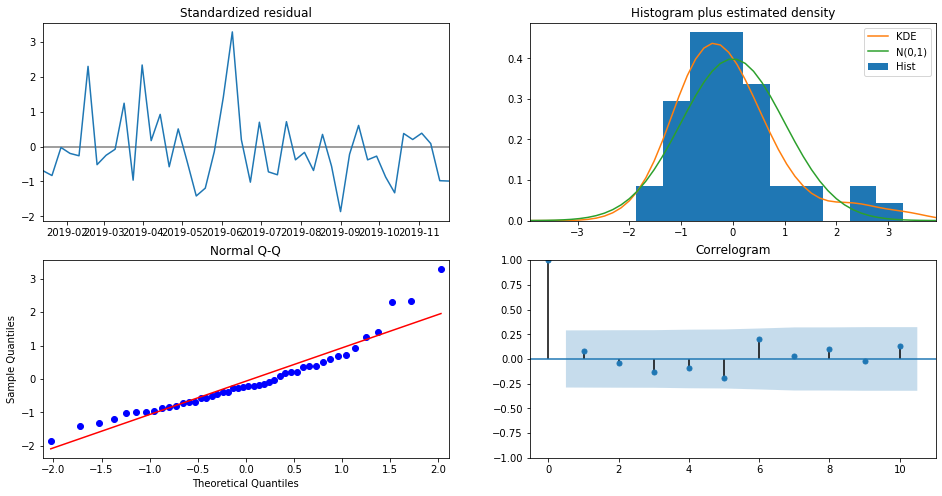

In [48]:
results01.plot_diagnostics(figsize=(16, 8))
plt.show()

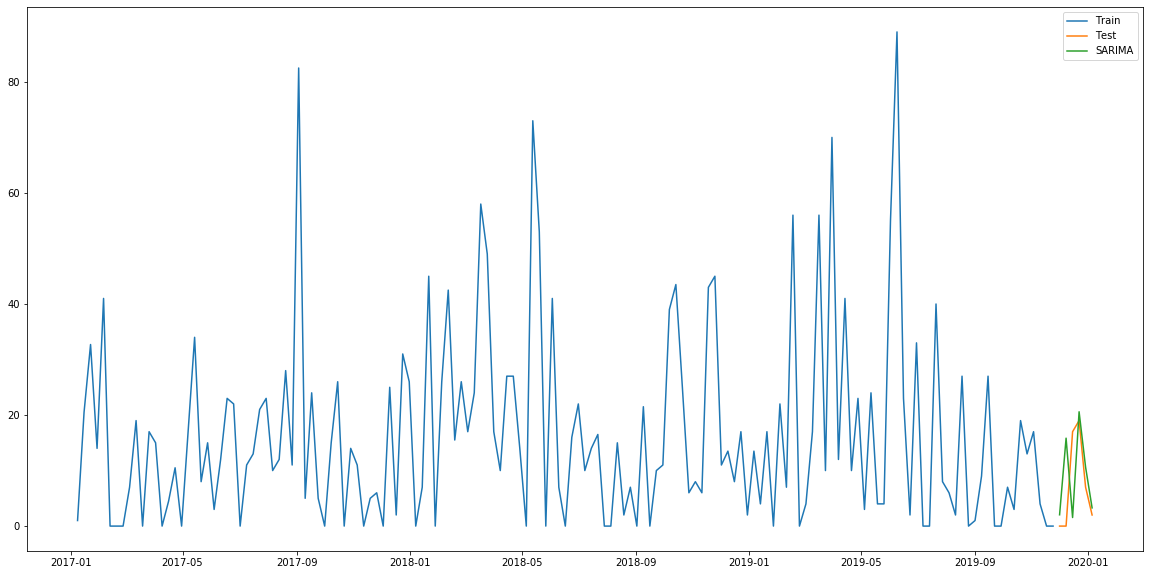

In [49]:
pred01 = results01.predict(start = test01.index[0], end = test01.index[-1], dynamic = True)
plt.figure(figsize = (20, 10))
plt.plot(train01.index, train01, label='Train')
plt.plot(test01.index, test01, label='Test')
plt.plot(pred01.index, pred01, label='SARIMA')
plt.legend(loc='best');

In [52]:
mod02 = sm.tsa.statespace.SARIMAX(co_df_part_1_weekly['Requested_Quantity'],
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 0, 52),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results02 = mod02.fit()
print(results02.summary()) 

                                 Statespace Model Results                                 
Dep. Variable:                 Requested_Quantity   No. Observations:                  157
Model:             SARIMAX(0, 1, 1)x(1, 1, 0, 52)   Log Likelihood                -236.429
Date:                            Tue, 28 Apr 2020   AIC                            478.859
Time:                                    12:24:26   BIC                            484.713
Sample:                                01-08-2017   HQIC                           481.103
                                     - 01-05-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9477      0.117     -8.095      0.000      -1.177      -0.718
ar.S.L52      -0.4881      0.103   

In [53]:
forecast02 = results02.forecast(4)

In [54]:
print(forecast02)

2020-01-12     1.709484
2020-01-19    26.912418
2020-01-26    -3.754868
2020-02-02    20.197601
Freq: W-SUN, dtype: float64


In [50]:
from sklearn.metrics import mean_squared_error
forecast01 = results01.forecast(6)
rmse_s = np.sqrt(mean_squared_error(test01, forecast01))
print(rmse_s)

NameError: name 'mean_squared_error' is not defined

In [ ]:
len(co_df_part_1_weekly)

In [ ]:
pred001 = results01.get_prediction(start=130, dynamic=True)
pred001_ci = pred001.conf_int()
ax = co_df_part_1_weekly.Requested_Quantity[:].plot(label='observed', figsize=(25,10))
pred001.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9, figsize=(25,10))
ax.fill_between(pred001_ci.index,
                pred001_ci.iloc[:, 0],
                pred001_ci.iloc[:, 1], color='k', alpha=.1)
ax.set_xlabel('Date')
ax.set_ylabel('Requested Quantity')
plt.legend()
plt.show()

In [ ]:
pred001_ci

In [ ]:
pred = results01.get_prediction(start=105, dynamic=True)
pred_ci = pred.conf_int()
ax = co_df_part_1_weekly.Requested_Quantity[:].plot(label='observed', figsize=(25,10))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9, figsize=(25,10))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.1)
ax.set_xlabel('Date')
ax.set_ylabel('Requested Quantity')
plt.legend()
plt.show()

## Trying out normalisation:
log transform is not possible because we have zero values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# prepare data for normalization
demand = co_df_part_1_weekly['Requested_Quantity'].values
demand = demand.reshape((len(demand), 1))


# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(demand)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

# normalize the dataset and print the first 5 rows
co_df_part_1_weekly['Normalised_Quantity'] = scaler.transform(demand)

'''
# inverse transform and print the first 5 rows
inversed = scaler.inverse_transform(normalized)
'''

In [ ]:
co_df_part_1_weekly.head()

In [ ]:
demand_part = co_df_part_1_weekly["Normalised_Quantity"].values.tolist()

In [ ]:
neg_demand=[]
for x in demand_part:
    if x == 0:
        neg_demand.append(x)
print(len(neg_demand))

In [ ]:
decomposition_n = seasonal_decompose(co_df_part_1_weekly["Normalised_Quantity"].dropna())

trend_n = decomposition_n.trend
seasonal_n = decomposition_n.seasonal
residual_n = decomposition_n.resid

f = plt.figure(figsize=(30,15))
ax1 = f.add_subplot(411)
ax2 = f.add_subplot(412)
ax3 = f.add_subplot(413)
ax4 = f.add_subplot(414)

ax1.plot(trend_n, label = 'Trend')
ax1.legend(loc='best')

ax2.plot(seasonal_n, label = 'Seasonal')
ax2.legend(loc='best')

ax3.plot(residual_n, label= 'Residual')
ax3.legend(loc='best')

ax4.plot(co_df_part_1_weekly.index, co_df_part_1_weekly['Normalised_Quantity'], label= 'Original')
ax4.legend(loc='best')

In [ ]:
mod02 = sm.tsa.statespace.SARIMAX(co_df_part_1_weekly['Normalised_Quantity'],
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 0, 52),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results02 = mod02.fit()
print(results02.summary())

In [ ]:
results02.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
co_df_part_1_weekly['Normalised_Forecast']=results01.predict(start=105, end = 157, dynamic = True)
co_df_part_1_weekly[['Normalised_Quantity','Normalised_Forecast']].plot(figsize=(25,10))

## Trying forecasting on monthly sampled data

In [ ]:
co_df_part_1_monthly = co_df_part_1.resample('M').sum()

In [ ]:
co_df_part_1_monthly.head()

In [ ]:
len(co_df_part_1_monthly)

In [ ]:
co_df_part_1_monthly['Requested_Quantity'].plot(figsize=(20,10))

In [ ]:
decomposition_m = seasonal_decompose(co_df_part_1_monthly["Requested_Quantity"])

trend_m = decomposition_m.trend
seasonal_m = decomposition_m.seasonal
residual_m = decomposition_m.resid

f = plt.figure(figsize=(30,15))
ax1 = f.add_subplot(411)
ax2 = f.add_subplot(412)
ax3 = f.add_subplot(413)
ax4 = f.add_subplot(414)

ax1.plot(trend_m, label = 'Trend')
ax1.legend(loc='best')

ax2.plot(seasonal_m, label = 'Seasonal')
ax2.legend(loc='best')

ax3.plot(residual_m, label= 'Residual')
ax3.legend(loc='best')

ax4.plot(co_df_part_1_monthly.index, co_df_part_1_monthly['Requested_Quantity'], label= 'Original')
ax4.legend(loc='best')

In [ ]:
plot_pacf(co_df_part_1_monthly['Requested_Quantity'], lags=16)
plot_acf(co_df_part_1_monthly['Requested_Quantity'], lags=16)

In [ ]:
dftest = adfuller(co_df_part_1_monthly["Requested_Quantity"], autolag='AIC')

dftest_output = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags used', 'number of obserbations used'])
for key, value in dftest[4].items():
    dftest_output['Critical Values (%s)' %key]=value
    
print(dftest_output)

In [ ]:
train = co_df_part_1_monthly['Requested_Quantity'][:-3]
test = co_df_part_1_monthly['Requested_Quantity'][-5:]

In [ ]:
test

In [ ]:
p = d = q = range(0,2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results=mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [ ]:
mod04 = sm.tsa.statespace.SARIMAX(train,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results04 = mod04.fit()
print(results04.summary())

In [ ]:
co_df_part_1_monthly['Monthly_Forecast']=results04.predict(start = test.index[0], end = test.index[-1], dynamic = True)
co_df_part_1_monthly[['Requested_Quantity','Monthly_Forecast']].plot(figsize=(25,10))

In [ ]:
pred = results04.predict(start = test.index[0], end = test.index[-1], dynamic = True)
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='SARIMA')
plt.legend(loc='best');

In [ ]:
co_df_part_1_monthly[['Requested_Quantity', 'Monthly_Forecast']][25:]

In [ ]:
from sklearn.metrics import mean_squared_error
rmse_SARIMA = np.sqrt(mean_squared_error(test,pred))

## Holt Winter's Model

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

In [ ]:
co_df_part_1_monthly.head()

In [ ]:
def exp_smoothing_configs(seasonal=[None]):
    models = list()
    # define config lists
    t_params = ['add', 'mul', None]
    d_params = [True, False]
    s_params = ['add', 'mul', None]
    p_params = seasonal
    b_params = [True, False]
    r_params = [True, False]
    # create config instances
    for t in t_params:
        for d in d_params:
            for s in s_params:
                for p in p_params:
                    for b in b_params:
                        for r in r_params:
                            cfg = [t,d,s,p,b,r]
                            models.append(cfg)
    return models

cfg_list = exp_smoothing_configs(seasonal=[12])

In [ ]:
train = co_df_part_1_monthly['Requested_Quantity'][:-5]
test = co_df_part_1_monthly['Requested_Quantity'][-6:]
#ind = train.index[34:]  # this will select last 12 months' indexes

In [ ]:
test

In [ ]:
print("Holt's Winter Model")
best_RMSE = np.inf
best_config = []
t1 = d1 = s1 = p1 = b1 = r1 = ''
for j in range(len(cfg_list)):
    print(j)
    try:
        cg = cfg_list[j]
        print(cg)
        t,d,s,p,b,r = cg
        # define model
        if not t:
            model = ExponentialSmoothing(train, trend=t, seasonal=s, seasonal_periods=p)
        else:
            model = ExponentialSmoothing(train, trend=t, damped=d, seasonal=s, seasonal_periods=p)
            
        # fit model
        model_fit = model.fit(optimized=True, use_boxcox=b, remove_bias=r)
        # make one step forecast
        y_forecast = model_fit.forecast(5)
        rmse = np.sqrt(mean_squared_error(test,y_forecast))
        print(rmse)
        if rmse < best_RMSE:
            best_RMSE = rmse
            best_config = cfg_list[j]
    except:
       continue

In [ ]:
print(best_RMSE, best_config)

In [ ]:
t1,d1,s1,p1,b1,r1 = best_config

if not t1:
    hw_model1 = ExponentialSmoothing(train, trend=t1, seasonal=s1, seasonal_periods=p1)
else:
    hw_model1 = ExponentialSmoothing(train, trend=t1, seasonal=s1, seasonal_periods=p1, damped=d1)

fit2 = hw_model1.fit(optimized=True, use_boxcox=b1, remove_bias=r1)

pred_HW = fit2.predict(start=test.index[0], end = test.index[-1])

In [ ]:
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred_HW.index, pred_HW, label="Holt Winter's")
plt.legend(loc='best');

In [ ]:
rmse_HW = np.sqrt(mean_squared_error(test,y_forecast))

In [ ]:
print(f"RMSE_SARIMA = {rmse_SARIMA} \nRMSE_HW = {rmse_HW}")

In [ ]:
train_w = co_df_part_1_weekly['Requested_Quantity'][:-6]
test_w = co_df_part_1_weekly['Requested_Quantity'][-6:]

In [ ]:
test_w

In [ ]:
cfg_list = exp_smoothing_configs(seasonal=[52])

In [ ]:
cfg_list

In [ ]:
print("Holt's Winter Model")
best_RMSE = np.inf
best_config = []
t1 = d1 = s1 = p1 = b1 = r1 = ''
for j in range(len(cfg_list)):
    print(j)
    try:
        cg = cfg_list[j]
        print(cg)
        t,d,s,p,b,r = cg
        # define model
        if not t:
            wmodel = ExponentialSmoothing(train_w, trend=t, seasonal=s, seasonal_periods=p)
        else:
            wmodel = ExponentialSmoothing(train_w, trend=t, damped=d, seasonal=s, seasonal_periods=p)
        # fit model
        print("inside")
        wmodel_fit = wmodel.fit(optimized=True, use_boxcox=b, remove_bias=r)
        # make one step forecast
        w_forecast = wmodel_fit.forecast(6)
        rmse = np.sqrt(mean_squared_error(test_w, w_forecast))
        
        print(rmse)
        if rmse < best_RMSE:
            best_RMSE = rmse
            best_config = cfg_list[j]
    except:
       continue

In [ ]:
print(best_RMSE, best_config)

In [ ]:
t1,d1,s1,p1,b1,r1 = best_config

if not t1:
    hw_modelw = ExponentialSmoothing(train_w, trend=t1, seasonal=s1, seasonal_periods=p1)
else:
    hw_modelw = ExponentialSmoothing(train_w, trend=t1, seasonal=s1, seasonal_periods=p1, damped=d1)

fitw = hw_modelw.fit(optimized=True, use_boxcox=b1, remove_bias=r1)

wpred_HW = fitw.predict(start=test_w.index[0], end = test_w.index[-1])

In [ ]:
print(fitw.summary())

In [ ]:
fitw.plot()

In [ ]:
plt.figure(figsize=(30, 15))
plt.plot(train_w.index, train_w, label='Train')
plt.plot(test_w.index, test_w, label='Test')
plt.plot(wpred_HW.index, wpred_HW, label="Holt Winter's")
plt.legend(loc='best');

In [ ]:
hw_forecast = fitw.forecast(6)
rmse = np.sqrt(mean_squared_error(test_w, hw_forecast))
print(rmse)